# Team 44 Group Assignment: Stroke Prediction

A stroke can be defined as an interruption of blood flow to part of the brain that can cause critical damage to brain tissue. This will result in permanent loss of brain function within minutes if blood flow is not reestablished immediately such as a loss of motor functions and rational thought. According to the Centres for Disease Control and Prevention (CDC), 1 in 6 deaths from cardiovascular diseases was from strokes in the year 2020 in the United States.

Hence, it is imperative that steps be taken to identify individuals who are at risk of getting a stroke to prevent permanent physiological damage to individuals of society.

In this machine learning project, we, Team 44 of the WIA1006 Machine Learning course of University of Malaya would like to develop a machine learning model that predicts which individual(s) are at risk of getting a stroke. We will analyze a dataset of interest that will be used to train different machine learning models of which we will evaluate their respective accuracies and efficiencies.

## Data Analysis

In [2]:
# Importing popular data science libraries
import pandas as pd # for data manipulation and analysis
import numpy as np #  for working with arrays - has functions working with linear algebra, fourier transform and matrices
import matplotlib.pyplot as plt # creating static, animated and interactive visualizations in Python
import seaborn as sns # provides high-level interface for drawing attractive and informative statistical graphics

### Loading dataset

This section involves previewing, studying the features and checking the dataset for missing values

In [3]:
data = pd.read_csv("stroke-dataset-ruthvik.csv")

In [4]:
data # prints the first and last few rows of training example

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


There is a column 'id' which is irrelevant because the unique identifiers are not meaningful. That column will be discarded from the dataframe.

In [5]:
data.drop(columns="id", inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


From the data.info() command, we can see that the feature 'bmi' has missing values relative to all the other features. The missing values will need to be handled in the data preprocessing section later.

In [7]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
print(data.ever_married.value_counts())
print(data.work_type.value_counts())
print(data.Residence_type.value_counts())
print(data.smoking_status.value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


We can see that there are some non-numeric features or categorical variables available in the dataset. These will be processed to become numeric, binary features later on in the data preprocessing section

### Data visualization

Creating graphical representations of the numeric features to perceive the dataset from a different angle

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

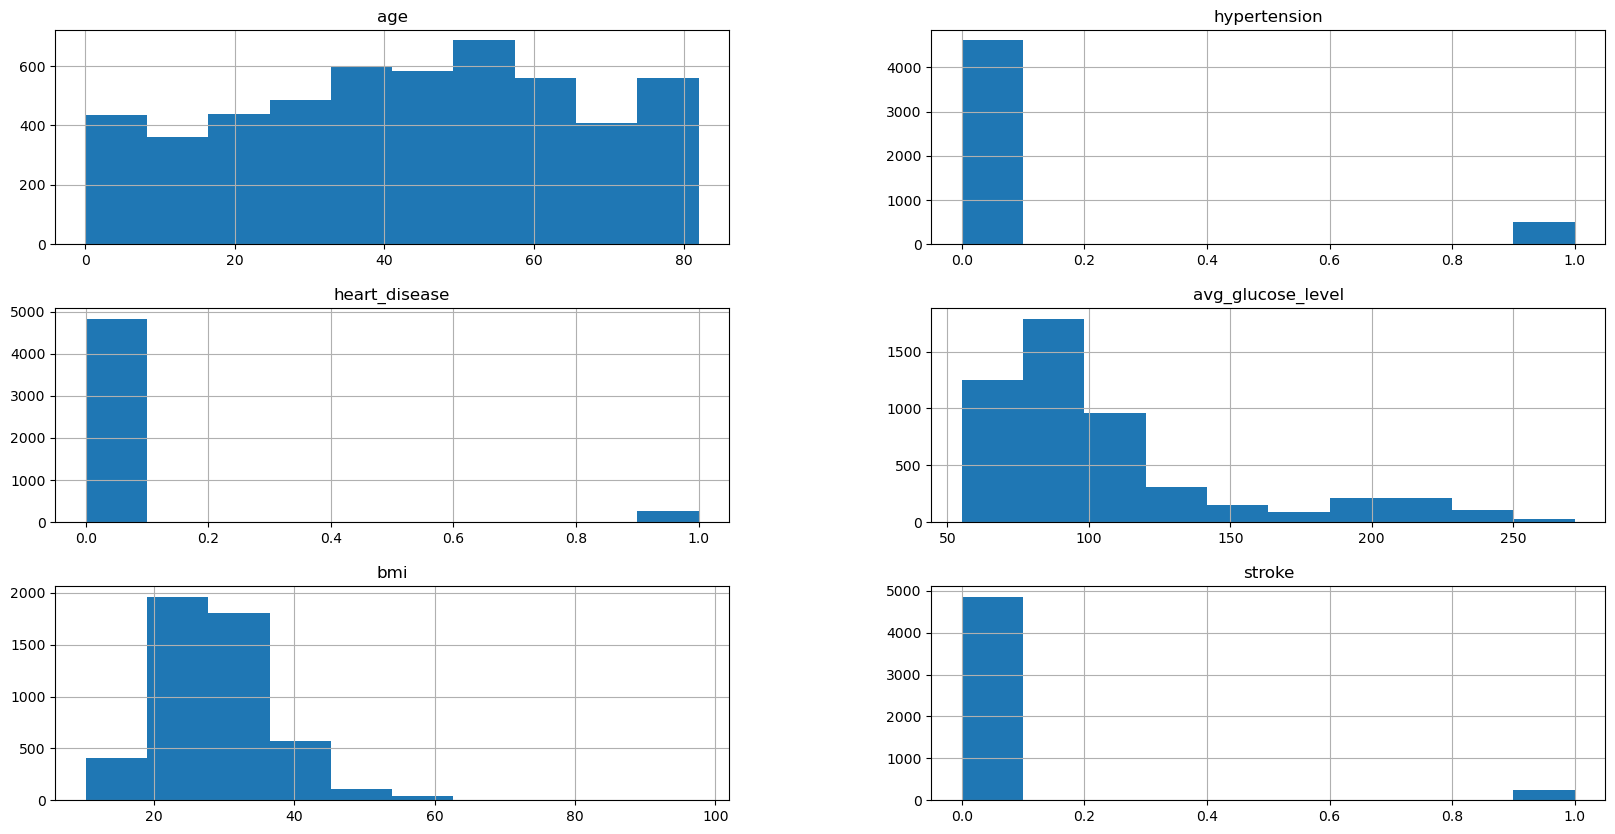

In [10]:
data.hist(figsize=(20,10))

C:\Users\kryxo\AppData\Local\Temp\ipykernel_18352\2616239986.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

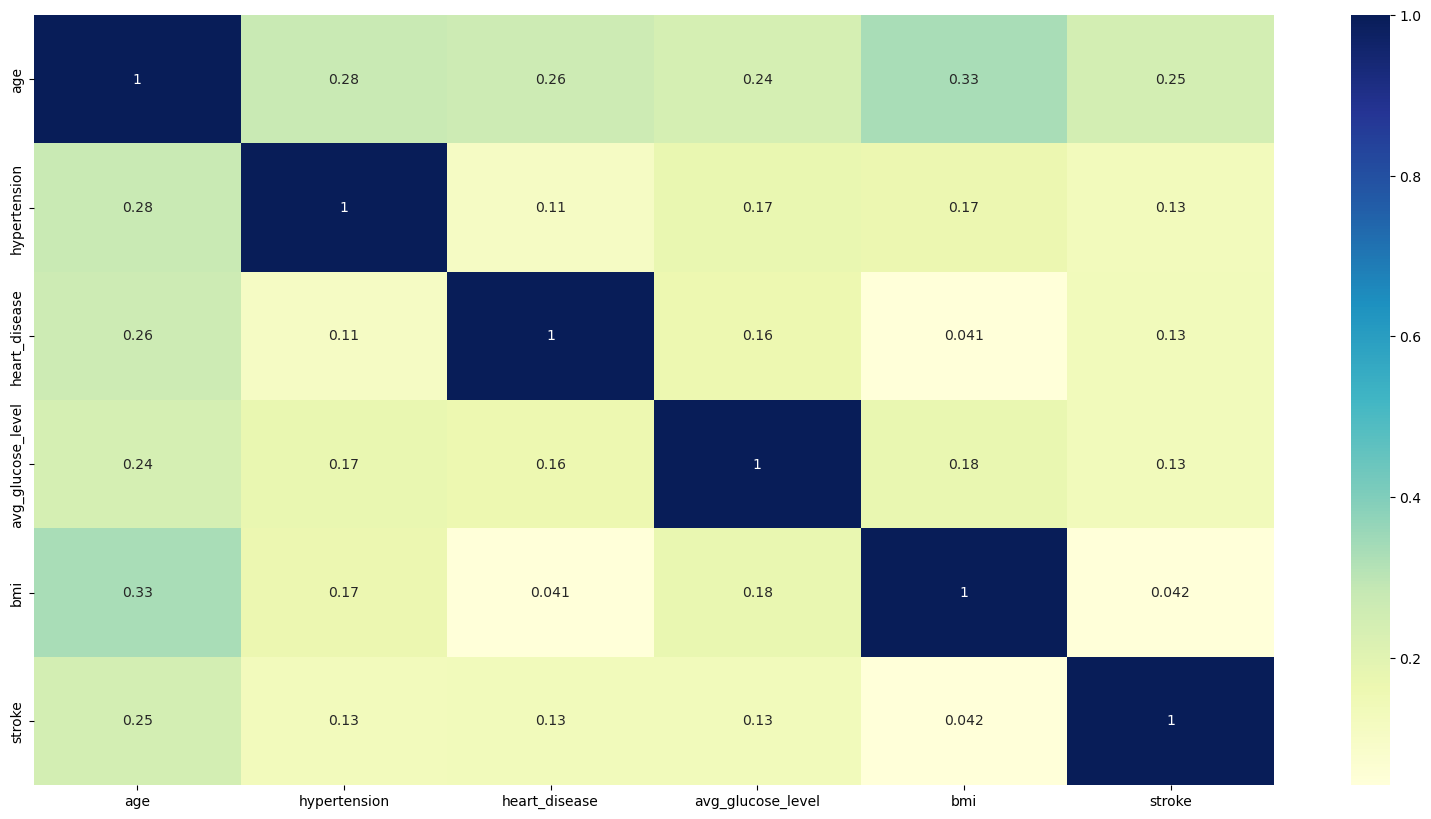

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

## Data Preprocessing

### Handling missing values

### Handling non-numerical values

## Machine Learning Model Training